## Looping Graph
### Objectives:
1. Implement `looping logic` to route the flow of data back to the nodes
2. Create a single `conditional edge` to handle decision-making and control graph flow.

**Main Goal**: Coding up `Looping Logic`

In [2]:
from typing import TypedDict, List, Dict
from langgraph.graph import StateGraph, END
import random

In [3]:
class AgentState(TypedDict):
  name: str
  number: List[int]
  counter: int

In [4]:
def greeting(state: AgentState) -> AgentState:
  """Greeting Node which says hi to the person"""
  state["name"] = f"Hi there, {state['name']}"
  state['counter'] = 0
  return state

def random_node(state: AgentState) -> AgentState:
  """Generates a random number from 0 to 10"""
  state["number"].append(random.randint(0, 10))
  state['counter'] += 1
  return state

def should_continue(state: AgentState):
  """Function to decided what to do next"""
  if state['counter'] < 5:
    print("ENTERING LOOP", state['counter'])
    return "loop"
  else:
    return "exit"


In [7]:
graph = StateGraph(AgentState)

graph.add_node("greeting", greeting)
graph.add_node("random", random_node)

graph.add_edge("greeting", "random")

graph.add_conditional_edges(
  "random",
  should_continue,
  {
    "loop": "random",
    "exit": END
  }
)

graph.set_entry_point("greeting")

app = graph.compile()

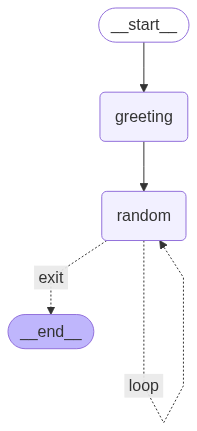

In [8]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [9]:
app.invoke({"name": "Ashik", "number": [], "counter":-1})

ENTERING LOOP 1
ENTERING LOOP 2
ENTERING LOOP 3
ENTERING LOOP 4


{'name': 'Hi there, Ashik', 'number': [1, 3, 10, 2, 6], 'counter': 5}

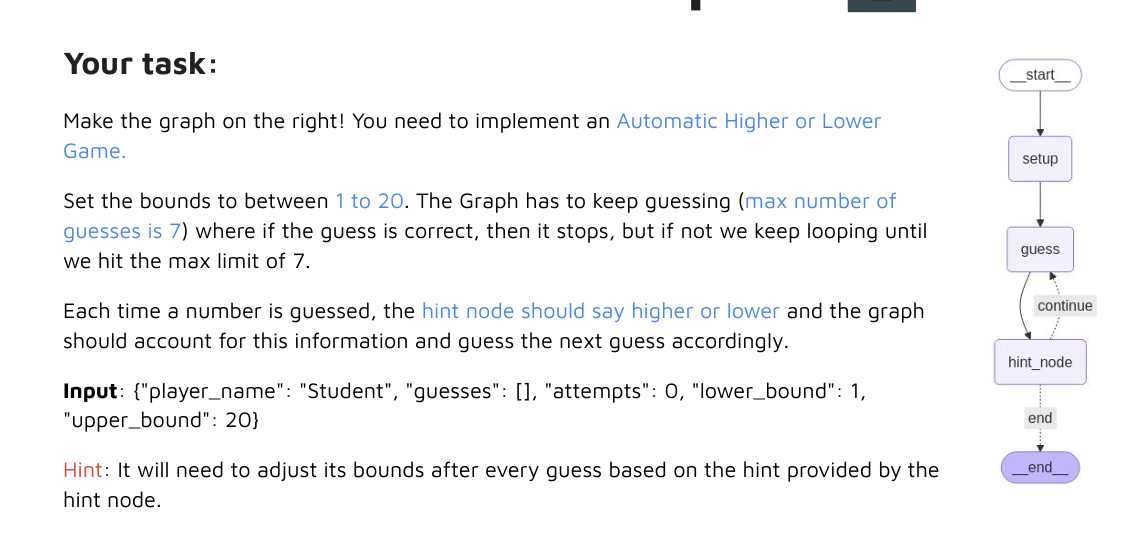

In [1]:
from typing import TypedDict, List, Dict
from langgraph.graph import StateGraph, END
import random

In [4]:
class AgentState2(TypedDict):
  player_name: str 
  random: int
  guess: int
  guesses: List[int]
  attempts: int
  lower_bound: int
  upper_bound: int

In [ ]:
def rand_gen_node(state: AgentState2) -> AgentState2:
  """This function will generate a random number (setup)"""
  state['random'] = random.randint(state['lower_bound'], state['upper_bound'])
  state['guesses'] = []
  state['attempts'] = 0
  return state

In [ ]:
def user_input_node(state: AgentState2) -> AgentState2:
  """This function will take input from user (guess)"""
  state['guess'] = int(input("Enter something: "))
  state['guesses'].append(state['guess'])
  state['attempts'] += 1
  return state

In [13]:
def decision_node(state: AgentState2):
  """This function will tell about where to go (hint_node)"""
  if state['guess'] == state['random']:
    return "correct"
  elif state['attempts'] > 6:
    return "stop"
  elif state['guess'] > state['random']:
    print("Use lower value")
    return "incorrect"
  elif state['guess'] < state['random']:
    print("Use higher value")
    return "incorrect"

In [14]:
def end_node(state: AgentState2):
  """This function will just tell the decision that you are win or not (end)"""
  if state['guess'] == state['random']:
    message = f" You win the game in {state['attempts']} attempts"
  else:
    message = "better luck next time"
  print(f"Hi {state['player_name']}," + message)

In [23]:
graph2 = StateGraph(AgentState2)

graph2.add_node("setup", rand_gen_node)
graph2.add_node("guess", user_input_node)
graph2.add_node("end", end_node)

graph2.set_entry_point("setup")
graph2.add_edge("setup", "guess")

graph2.add_conditional_edges(
  "guess",
  decision_node,
  {
    "correct": "end",
    "stop": "end",
    "incorrect": "guess"
  }
)

graph2.set_finish_point("end")

app2 = graph2.compile()

In [26]:
from IPython.display import Image, display

display(Image(app2.get_graph().draw_mermaid_png()))

ValueError: Failed to reach https://mermaid.ink/ API while trying to render your graph. Status code: 400.

To resolve this issue:
1. Check your internet connection and try again
2. Try with higher retry settings: `draw_mermaid_png(..., max_retries=5, retry_delay=2.0)`
3. Use the Pyppeteer rendering method which will render your graph locally in a browser: `draw_mermaid_png(..., draw_method=MermaidDrawMethod.PYPPETEER)`